In [4]:
import numpy as np
import pandas as pd

sound_data = pd.read_csv('datasets/joeandelon_dataset.csv')
X = sound_data.drop(['filename', 'label'], axis=1)
y = sound_data['label']
sound_data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,jre11692500_1052.wav,0.448598,0.028928,2080.847448,2008.882838,3923.628743,0.115741,-341.318420,113.181503,-7.962464,...,2.251206,-7.436673,1.016100,-7.232157,0.593498,-3.061135,-5.036133,-5.082611,2.814416,onlyelon
1,jre11692500_1110.wav,0.465239,0.035019,2029.441322,2164.512973,4094.698079,0.093406,-342.853485,117.616440,-6.780078,...,0.875378,-10.107781,2.555796,-4.323263,1.607108,-2.905854,-3.368111,-4.217307,2.550136,onlyelon
2,jre11692500_1221.wav,0.417063,0.043447,2137.432813,2008.802801,4020.029704,0.115904,-314.851105,110.585396,-1.947576,...,-3.918649,-11.109963,2.969754,-9.859651,0.681731,-4.884421,-2.332748,-10.898901,0.942817,onlyelon
3,jre11692500_1222.wav,0.401652,0.030493,2167.646775,2249.252254,4535.231527,0.101924,-357.333588,111.402390,1.889445,...,0.455391,-9.179242,-0.060869,-7.211216,3.888539,-5.885221,-5.875665,-7.047946,0.793256,onlyelon
4,jre11692500_1227.wav,0.436806,0.040386,2225.985477,2085.507477,4340.635173,0.118024,-327.077789,101.790146,-4.118166,...,-1.572093,-10.279473,-0.114274,-7.235305,2.878800,-6.320262,-4.283320,-4.310355,2.035467,onlyelon


In [6]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
scaled_X = st_scaler.fit_transform(X)

encoded_y = y.replace(['onlyelon', 'onlyjoe'], [0,1])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, encoded_y, test_size=0.2)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [42]:
history = model.fit(np.array(X_train), y_train, 
                    epochs=20, 
                    batch_size=24,
                   verbose=2,
                   validation_data=(np.array(X_test), y_test))

Epoch 1/20
7/7 - 0s - loss: 0.5788 - accuracy: 0.6957 - val_loss: 0.5007 - val_accuracy: 0.8049
Epoch 2/20
7/7 - 0s - loss: 0.3616 - accuracy: 0.8696 - val_loss: 0.4056 - val_accuracy: 0.7561
Epoch 3/20
7/7 - 0s - loss: 0.2520 - accuracy: 0.9193 - val_loss: 0.3595 - val_accuracy: 0.7805
Epoch 4/20
7/7 - 0s - loss: 0.1895 - accuracy: 0.9255 - val_loss: 0.3589 - val_accuracy: 0.7805
Epoch 5/20
7/7 - 0s - loss: 0.1584 - accuracy: 0.9441 - val_loss: 0.3572 - val_accuracy: 0.8049
Epoch 6/20
7/7 - 0s - loss: 0.1418 - accuracy: 0.9441 - val_loss: 0.3737 - val_accuracy: 0.8049
Epoch 7/20
7/7 - 0s - loss: 0.1186 - accuracy: 0.9503 - val_loss: 0.4284 - val_accuracy: 0.8049
Epoch 8/20
7/7 - 0s - loss: 0.1062 - accuracy: 0.9565 - val_loss: 0.4635 - val_accuracy: 0.8049
Epoch 9/20
7/7 - 0s - loss: 0.1002 - accuracy: 0.9503 - val_loss: 0.4908 - val_accuracy: 0.8049
Epoch 10/20
7/7 - 0s - loss: 0.0880 - accuracy: 0.9503 - val_loss: 0.4987 - val_accuracy: 0.8293
Epoch 11/20
7/7 - 0s - loss: 0.0881 - a

In [85]:
from pydub import AudioSegment
import librosa
import pathlib
import os



def preprocessing(filename):
    

    y, sr = librosa.load(f"audio/{filename}.wav", mono=True)
    
    
    rmse = librosa.feature.rms(y=y) #root mean squred ENERGY note. changed to rms form rmse
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    
    to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

    for e in mfcc:
        to_append += f' {np.mean(e)}'
    
    scaled_data = st_scaler.transform([to_append.split()])
    
    return scaled_data


def easy_processing(data):
    scaled_data = st_scaler.transform(data)
    return scaled_data

In [73]:
vector = preprocessing(f'roganclimate/roganclimate12')
model.predict(vector)

array([[0.9653148]], dtype=float32)

# Labeling the rest of the Data

In [75]:
full_data = pd.read_csv('datasets/jre11692500_dataset.csv')
full_X = full_data.drop(['filename', 'label'], axis=1)
full_X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.490575,0.025069,2171.913549,2139.885722,4431.553141,0.101278,-380.533020,112.694641,-31.796848,1.780545,...,10.122002,-1.219215,-5.020499,-8.176243,-6.034646,5.141100,-4.364628,-1.783790,-1.651915,-2.534616
1,0.441578,0.031176,2452.753355,2400.318018,5115.332031,0.126144,-353.482391,92.485397,-3.311667,21.250517,...,-3.828105,-2.363839,-5.873488,2.105093,-7.501835,2.208278,-3.906220,-3.250791,-2.498704,0.930458
2,0.391119,0.049024,2102.894499,2018.743044,3995.107015,0.106585,-298.112457,105.581268,-1.911337,38.332870,...,-2.136520,-4.300785,-13.941048,0.797238,-8.774372,-1.213172,-6.336737,-4.957156,-6.576495,-1.673529
3,0.428866,0.045402,2333.984810,2293.200629,4721.254476,0.122138,-320.261993,90.473358,-6.332556,19.515079,...,-5.643833,0.182823,-5.851745,1.892823,-8.513250,-0.875803,-3.156975,1.127327,-8.081711,-0.223936
4,0.392580,0.078346,2117.510208,1985.690741,4041.263835,0.106025,-212.490799,114.457481,-15.307856,31.170403,...,-6.294614,1.813047,-9.025507,5.128049,-10.878364,-1.351574,-6.415203,-4.860430,-8.252588,-0.868342


In [86]:
processed_X = easy_processing(full_X.to_numpy())

In [88]:
predictions = model.predict(processed_X)

In [99]:
full_data['predictions'] = predictions

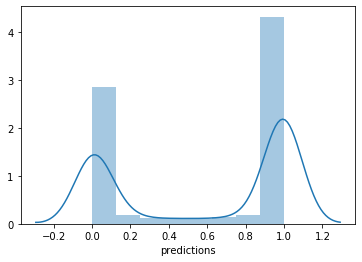

In [102]:
import seaborn as sns
sns.distplot(full_data['predictions'])

In [111]:
def bins(prediction):
    if prediction < 0.1:
        return 0
    elif prediction > 0.9:
        return 1
    else:
        return -1

full_data['label'] = full_data['predictions'].apply(bins)

In [114]:
full_data[full_data['label'] == 0]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,predictions
57,jre11692500_1049.wav,0.445622,0.032967,2234.723737,2276.892757,4662.237549,0.104375,-357.928284,100.564522,-2.909567,...,-1.725489,1.203818,-7.243710,7.452059,-5.219861,0.398664,1.292675,-0.392552,0,0.033899
60,jre11692500_1051.wav,0.394083,0.028957,2491.158212,2325.745750,4948.549398,0.130163,-355.497681,85.947212,-1.162277,...,-9.455327,4.970291,-7.070872,-0.232445,-1.836225,0.695957,-5.898893,6.519522,0,0.000230
61,jre11692500_1052.wav,0.448598,0.028928,2080.847448,2008.882838,3923.628743,0.115741,-341.318420,113.181503,-7.962464,...,-7.436673,1.016100,-7.232157,0.593498,-3.061135,-5.036133,-5.082611,2.814416,0,0.000480
63,jre11692500_1054.wav,0.429012,0.034440,2259.825771,2035.165811,4252.807617,0.119769,-319.924042,103.454185,-8.208372,...,-10.309953,3.153713,-7.490628,2.568416,-5.494031,-3.310235,-5.028968,2.968729,0,0.000161
64,jre11692500_1055.wav,0.381868,0.042097,2385.548219,2032.106218,4354.791260,0.129385,-308.599487,96.659729,-6.920285,...,-11.185966,3.231854,-7.031298,2.589897,-4.210723,-2.290467,-8.812709,5.414944,0,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,jre11692500_972.wav,0.425602,0.029425,2112.801148,2112.718445,4173.453776,0.112047,-353.358978,112.635895,-6.033937,...,-4.950747,6.007372,-7.962348,5.085565,-3.283815,-2.025587,-5.058413,1.311902,0,0.002483
3219,jre11692500_974.wav,0.452612,0.034044,2399.424792,2215.541868,4771.000163,0.133491,-333.074158,99.664490,-0.339189,...,-4.008144,1.449078,-5.439083,2.812477,-4.539882,-0.883622,-3.993123,2.046856,0,0.009589
3220,jre11692500_975.wav,0.399547,0.047620,2088.146606,1864.514098,3831.215413,0.121067,-288.383362,112.956551,-13.874288,...,-5.805062,1.908816,-9.457552,1.897673,-4.819354,-4.841744,-5.404642,4.363406,0,0.000141
3223,jre11692500_978.wav,0.378418,0.045798,2231.260927,2062.956823,4287.001546,0.109651,-296.911957,111.001060,-16.751482,...,-5.043166,0.729686,-10.794660,4.992422,-3.164106,-6.304213,-6.475934,2.337244,0,0.000361


In [115]:
full_data.to_csv('datasets/jrelabeled.csv', index=False)